In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext zipline

D:\python\venvs\Trading\lib\site-packages\exchange_calendars\exchange_calendar.py:2347: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  align: pd.Timedelta | str = pd.Timedelta(1, "T"),


In [5]:
# %zipline bundles

In [6]:
import sys
import os

PATH = os.getcwd()
for _ in range(2):
    PATH = os.path.dirname(PATH)
if PATH not in sys.path:
    sys.path.append(PATH)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from FactorAnalysis.week1.helpers.data_processing import read_from_db, read_table_names
from FactorAnalysis.week3.helpers.strat_long_short import create_full_tear_sheet
from FactorAnalysis.week2.helpers.data_preprocessing import pop_OHLCV
from FactorAnalysis.week4.helpers.strat_long_short import run_algo
from zipline.data import bundles
from tqdm import tqdm

In [8]:
sns.set_theme()
warnings.filterwarnings("ignore")

In [10]:
# bundles.bundles

## Load Data

In [11]:
db_out_filename = "../week2/data/combined_factors.db"
combined_factors = read_from_db("combined_factors", db_out_filename)
combined_factors

IC_10D     IC_1D     IC_5D  IC_rank_10D  IC_rank_1D  \
trade_date ts_code                                                            
2019-01-02 000001.SZ  0.316205 -0.268799  0.317371     0.315399   -0.196979   
           000002.SZ  0.158128 -0.113168  0.159362     0.155529   -0.077551   
           000006.SZ -0.877584  0.820225 -0.875525    -0.892974    0.593089   
           000008.SZ -1.444015  1.212432 -1.448062    -1.453559    0.813689   
           000009.SZ  1.036315 -0.949642  1.033794     1.062858   -0.662007   
...                        ...       ...       ...          ...         ...   
2023-12-29 688777.SH  0.416214 -0.379571  0.416015     0.420395   -0.283712   
           688778.SH  0.529804 -0.396453  0.532321     0.534836   -0.224171   
           688779.SH  1.670957 -1.474135  1.668533     1.702817   -1.001081   
           688819.SH  0.938793 -0.882261  0.936565     0.954246   -0.641553   
           688981.SH  0.398772 -0.303984  0.401417     0.398776   -0.202384   

                      IC_rank_5D     IR_1D     IR_5D    IR_10D  IR_rank_1D  \
trade_date ts_code                                                           
2019-01-02 000001.SZ    0.316223 -0.258811  0.325115  0.323956   -0.188321   
           000002.SZ    0.155852 -0.106590  0.162463  0.161536   -0.072177   
           000006.SZ   -0.897035  0.789079 -0.865639 -0.871567    0.557461   
           000008.SZ   -1.462231  1.163067 -1.444954 -1.445167    0.760419   
           000009.SZ    1.071049 -0.906732  1.024029  1.033029   -0.603039   
...                          ...       ...       ...       ...         ...   
2023-12-29 688777.SH    0.421933 -0.365246  0.413921  0.415758   -0.267945   
           688778.SH    0.539466 -0.361628  0.523818  0.523908   -0.187682   
           688779.SH    1.712639 -1.386152  1.628355  1.641645   -0.900213   
           688819.SH    0.958226 -0.847408  0.926697  0.933033   -0.602803   
           688981.SH    0.401417 -0.286616  0.406980  0.405402   -0.181647   

                      IR_rank_5D  IR_rank_10D  
trade_date ts_code                             
2019-01-02 000001.SZ    0.323839     0.322782  
           000002.SZ    0.158095     0.157922  
           000006.SZ   -0.892046    -0.887210  
           000008.SZ   -1.460244    -1.451426  
           000009.SZ    1.071496     1.061855  
...                          ...          ...  
2023-12-29 688777.SH    0.420455     0.418707  
           688778.SH    0.532140     0.527770  
           688779.SH    1.680079     1.670020  
           688819.SH    0.952799     0.948213  
           688981.SH    0.406441     0.403887  

[1398271 rows x 12 columns]

In [12]:
db_factors = "../week1/data/factors.db"
start_date = "20190101"
factors_all = read_from_db("factors_all_stocks", db_factors)
_, factors_all = pop_OHLCV(factors_all, start_date)
factors_all

total_mv       pe      pb  turnover_rate  \
trade_date ts_code                                                   
2019-01-02 000001.SZ  1.577961e+07   6.8048  0.7330         0.3141   
           000002.SZ  2.638357e+07   9.4053  1.8845         0.2543   
           000006.SZ  6.952474e+05   8.6298  1.1932         0.4690   
           000008.SZ  1.093512e+06  12.5147  1.5395         0.3862   
           000009.SZ  9.242183e+05  69.3838  1.8163         0.4807   
...                            ...      ...     ...            ...   
2023-12-29 688777.SH  3.564168e+06  44.6677  3.7781         1.0662   
           688778.SH  1.667936e+06  14.8850  1.9711         1.3076   
           688779.SH  1.408329e+06   9.4551  1.8959         1.4990   
           688819.SH  2.714103e+06  14.2235  1.8325         2.0174   
           688981.SH  4.213257e+07  34.7254  2.9461         0.6409   

                      reversal_rate  volatility      roe  netprofit_yoy  \
trade_date ts_code                                                        
2019-01-02 000001.SZ      -1.605996    1.366827  10.7415         7.0249   
           000002.SZ      -0.292032    1.997503  23.4175        20.3938   
           000006.SZ      -0.386847    2.339673  14.8612         8.5159   
           000008.SZ      -2.267003    2.504395   4.5088       -62.7994   
           000009.SZ      -2.272727    2.436176   4.1632        60.4913   
...                             ...         ...      ...            ...   
2023-12-29 688777.SH       0.331858    2.291518   9.4394        46.1633   
           688778.SH       2.033462    1.749618   4.9503       -53.7777   
           688779.SH       3.253182    1.945117   0.9105       -93.5129   
           688819.SH       1.232777    1.552743  12.0166        20.1186   
           688981.SH       0.018864    1.336868   2.6592       -60.8629   

                       or_yoy  assets_yoy  equity_yoy  gross_profit_margin  \
trade_date ts_code                                                           
2019-01-02 000001.SZ  10.3322      5.2369      8.1007             0.276149   
           000002.SZ  22.5537     31.1695     17.4025             0.226620   
           000006.SZ -15.1246      3.0198     11.3132             0.425578   
           000008.SZ  10.0376     -1.9849      2.9215             0.169621   
           000009.SZ  66.8047     10.1084      5.4212             0.088334   
...                       ...         ...         ...                  ...   
2023-12-29 688777.SH  34.3601     36.0400     93.2553             0.132342   
           688778.SH -41.6003     -9.7115      6.3396             0.034162   
           688779.SH -34.1076    -12.9175      4.3134             0.009363   
           688819.SH  16.7155     24.9052     12.8391             0.057639   
           688981.SH -12.3540     10.0241      7.6862             0.156187   

                      operating_profit_margin  net_profit_margin  \
trade_date ts_code                                                 
2019-01-02 000001.SZ                 0.276783           0.212636   
           000002.SZ                 0.226749           0.165521   
           000006.SZ                 0.424906           0.367510   
           000008.SZ                 0.168828           0.133295   
           000009.SZ                 0.091549           0.056768   
...                                       ...                ...   
2023-12-29 688777.SH                 0.132386           0.124125   
           688778.SH                 0.034347           0.031492   
           688779.SH                 0.008315           0.008635   
           688819.SH                 0.057333           0.046742   
           688981.SH                 0.156065           0.145061   

                      operating_cash_flow_to_net_income  \
trade_date ts_code                                        
2019-01-02 000001.SZ                          -2.309735   
           000002.SZ                           0.682294   
   

## Backtest

In [23]:
res_df = run_algo(combined_factors, factors_all, "data/outputs")

2019-01-30 21:00:00+00:00
2019-02-28 21:00:00+00:00
2019-03-28 20:00:00+00:00
2019-04-26 20:00:00+00:00
2019-05-24 20:00:00+00:00
2019-06-24 20:00:00+00:00
2019-07-23 20:00:00+00:00
2019-08-20 20:00:00+00:00
2019-09-18 20:00:00+00:00
2019-10-16 20:00:00+00:00
2019-11-13 21:00:00+00:00
2019-12-12 21:00:00+00:00
2020-01-13 21:00:00+00:00
2020-02-11 21:00:00+00:00
2020-03-11 20:00:00+00:00
2020-04-08 20:00:00+00:00
2020-05-07 20:00:00+00:00
2020-06-05 20:00:00+00:00
2020-07-06 20:00:00+00:00
2020-08-03 20:00:00+00:00
2020-08-31 20:00:00+00:00
2020-09-29 20:00:00+00:00
2020-10-27 20:00:00+00:00
2020-11-24 21:00:00+00:00
2020-12-23 21:00:00+00:00
2021-01-25 21:00:00+00:00
2021-02-23 21:00:00+00:00
2021-03-23 20:00:00+00:00
2021-04-21 20:00:00+00:00
2021-05-19 20:00:00+00:00
2021-06-17 20:00:00+00:00
2021-07-16 20:00:00+00:00
2021-08-13 20:00:00+00:00
2021-09-13 20:00:00+00:00
2021-10-11 20:00:00+00:00
2021-11-08 21:00:00+00:00
2021-12-07 21:00:00+00:00
2022-01-05 21:00:00+00:00
2022-02-03 2

In [24]:
benchmark_filename = "../week3/data/hs300.csv"

Start date,2019-01-02
End date,2023-12-29
Total months,59
,Backtest
Annual return,47.566%
Cumulative returns,597.566%
Annual volatility,19.216%
Sharpe ratio,2.12
Calmar ratio,1.96
Stability,0.94
Max drawdown,-24.27%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.27,2022-01-12,2022-04-26,2022-08-11,152
1,17.51,2019-04-04,2019-06-06,2019-09-03,109
2,14.77,2020-03-05,2020-03-23,2020-05-19,54
3,13.28,2022-08-17,2022-10-25,2022-11-17,67
4,13.20,2023-08-04,2023-12-26,NaT,NaN


Stress Events,mean,min,max
Covid,0.14%,-7.01%,5.21%


Top 10 long positions of all time,max
sid,
601658SH,14.68%
601816SH,9.13%
000651SZ,8.58%
003816SZ,8.56%
601995SH,7.94%
600745SH,4.20%
603195SH,3.24%
601916SH,2.67%
601111SH,2.60%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
601658SH,14.68%
601816SH,9.13%
000651SZ,8.58%
003816SZ,8.56%
601995SH,7.94%
600745SH,4.20%
603195SH,3.24%
601916SH,2.67%
601111SH,2.60%


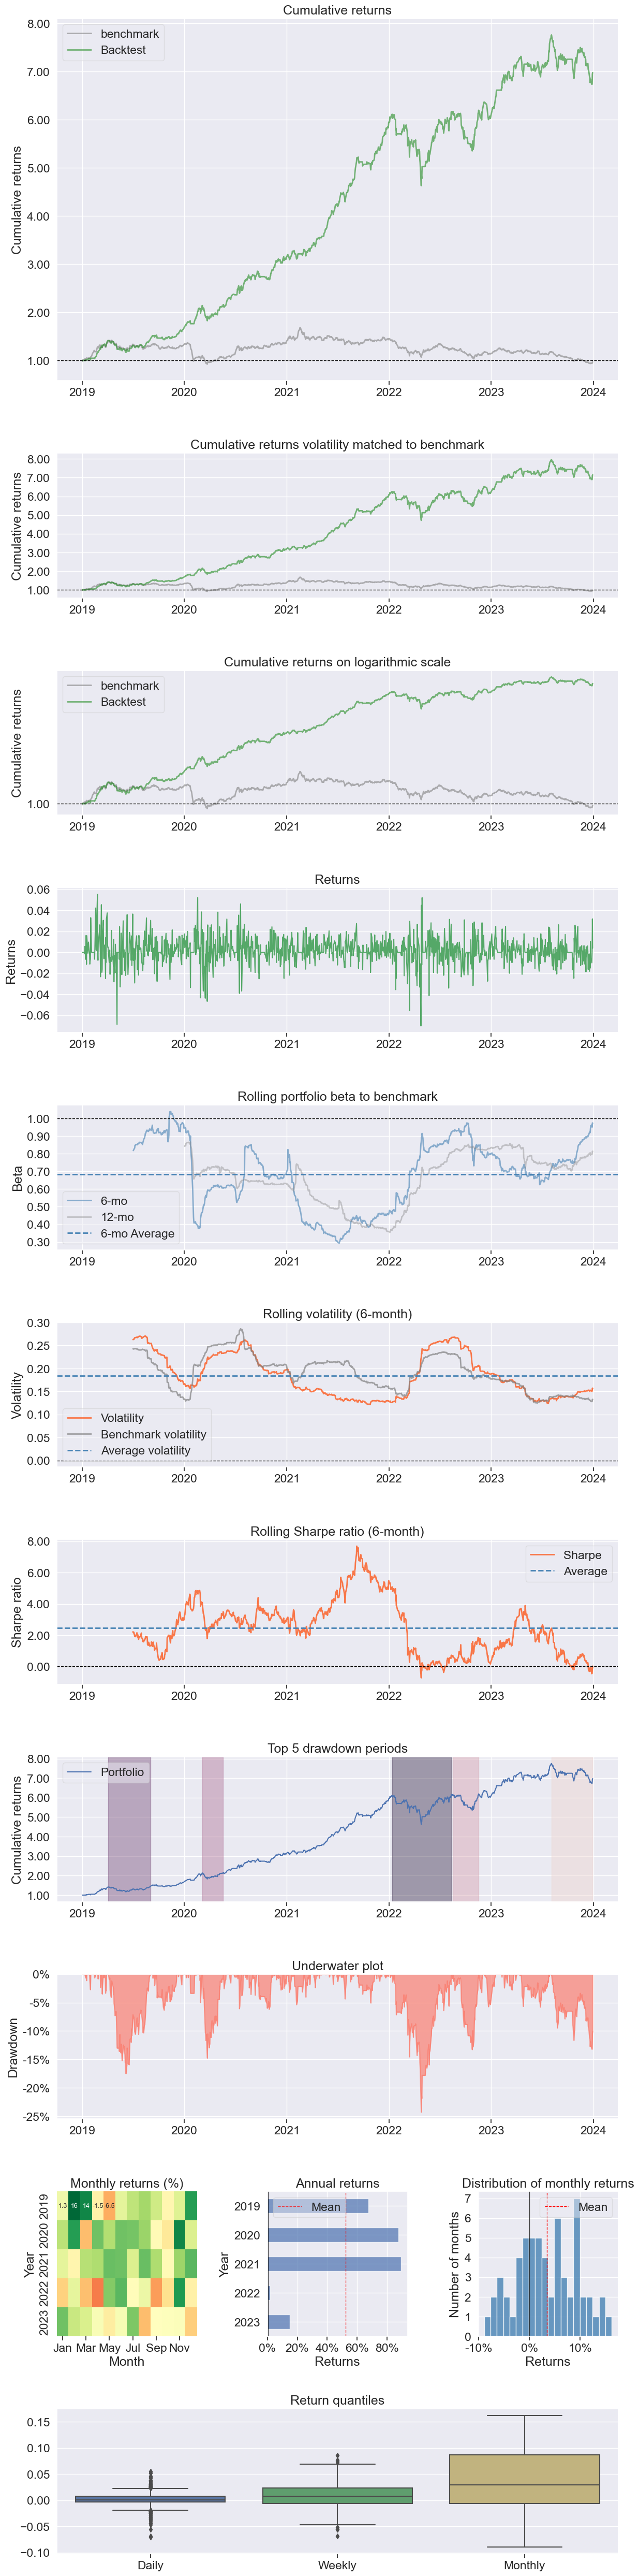

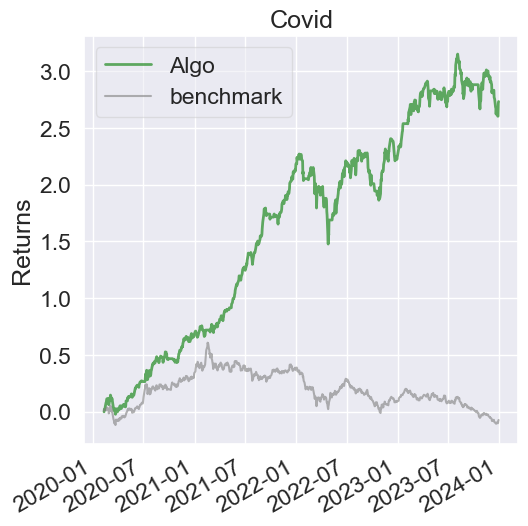

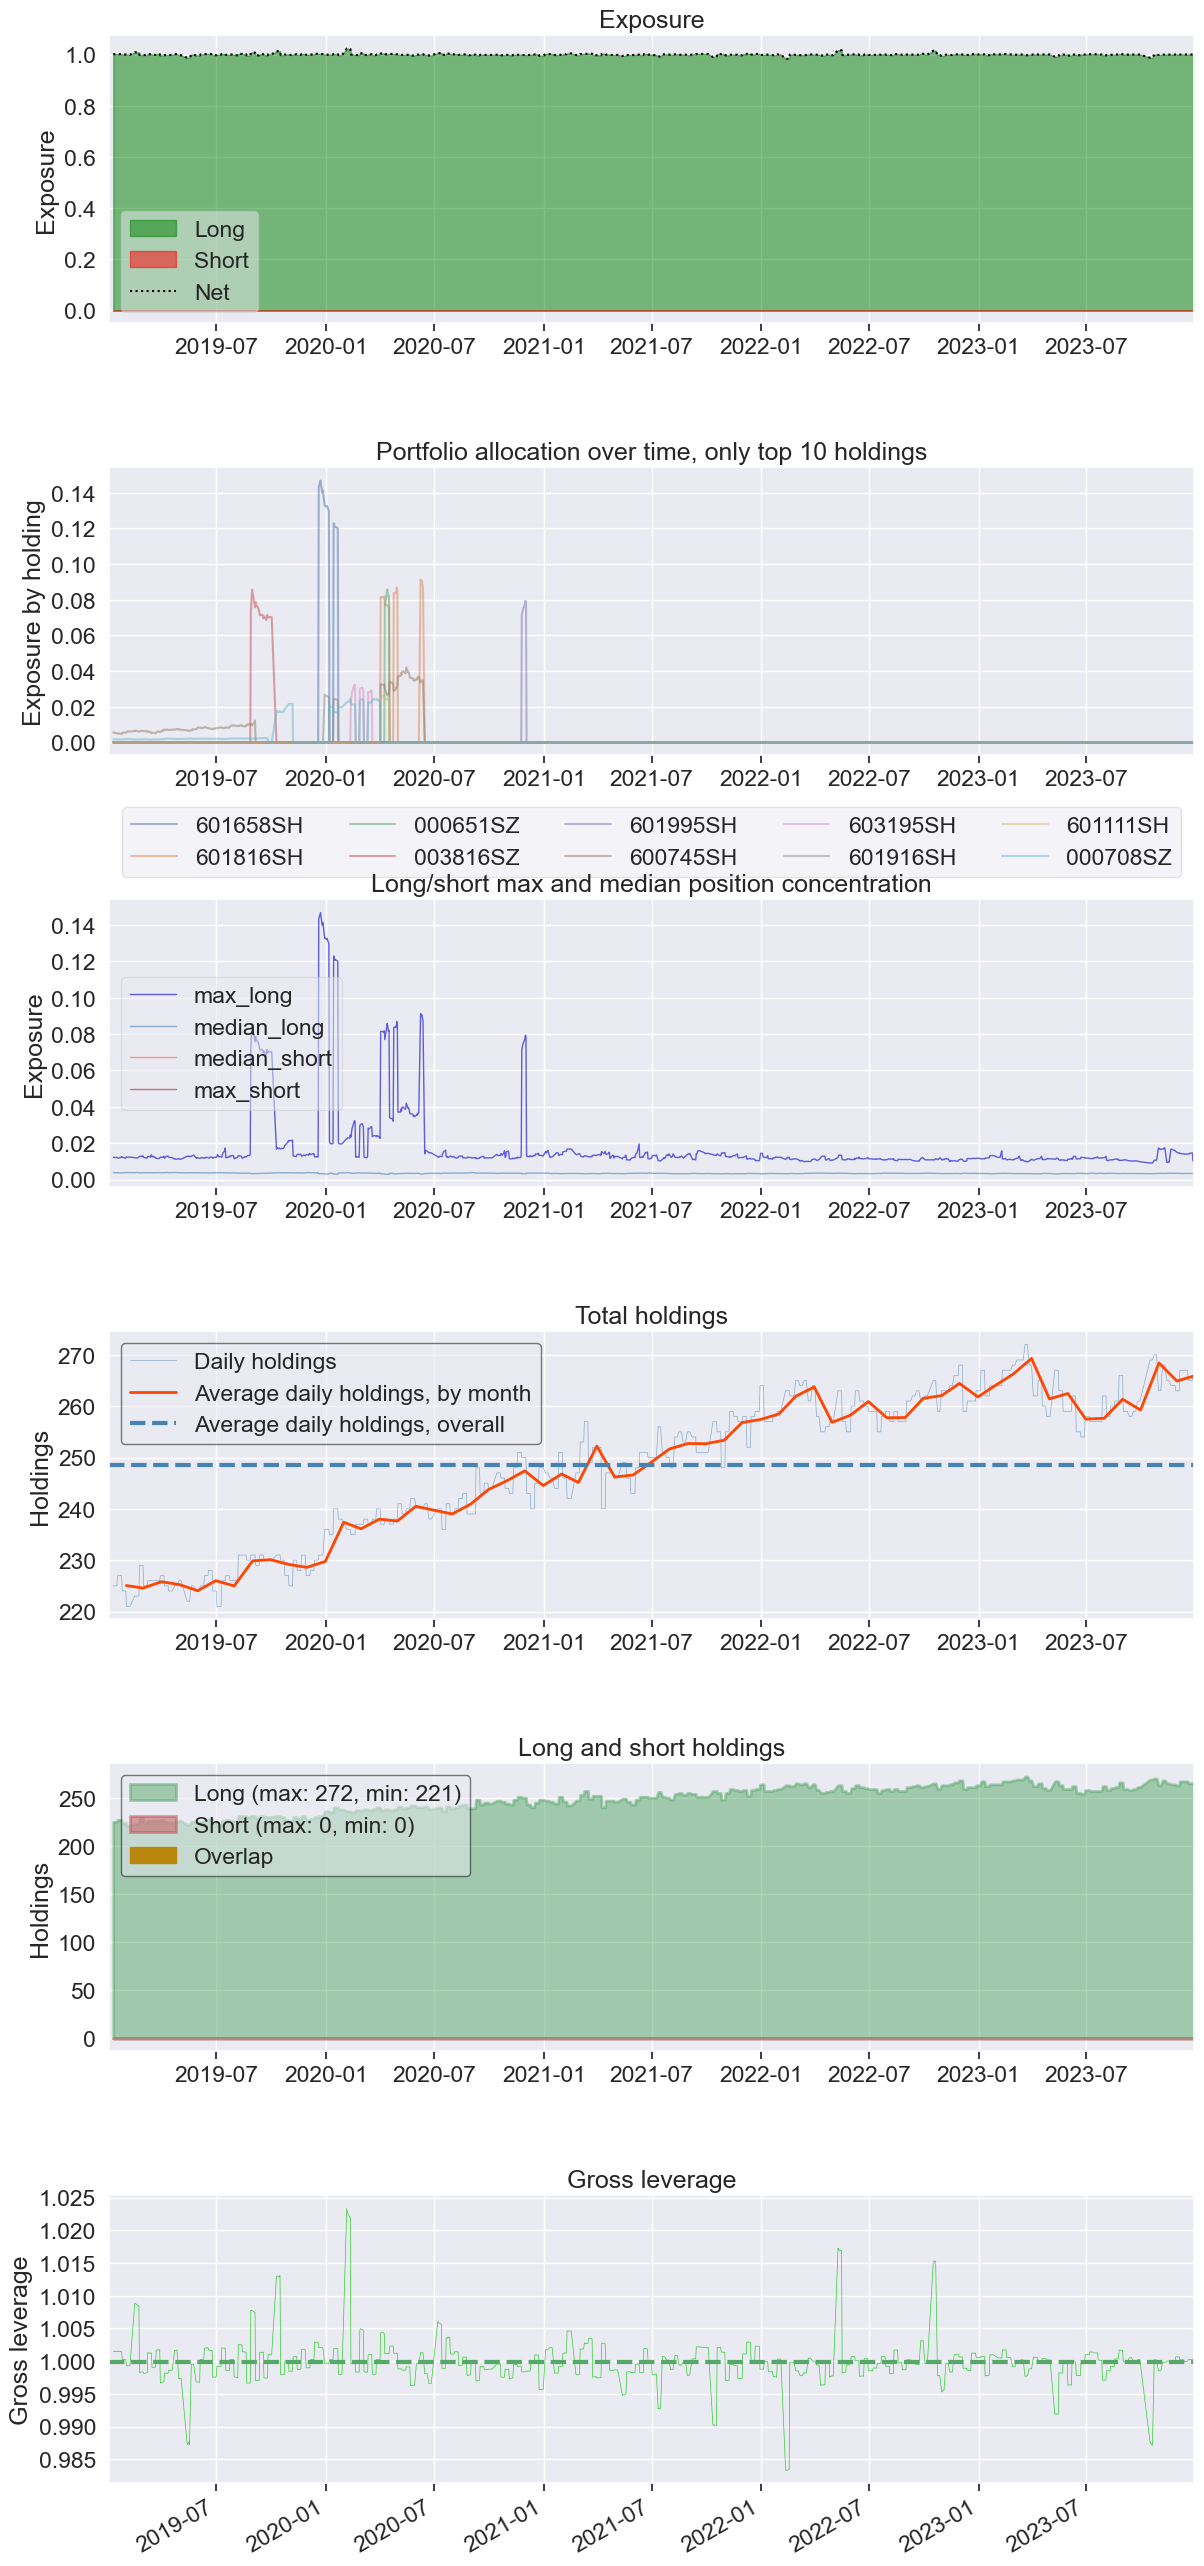

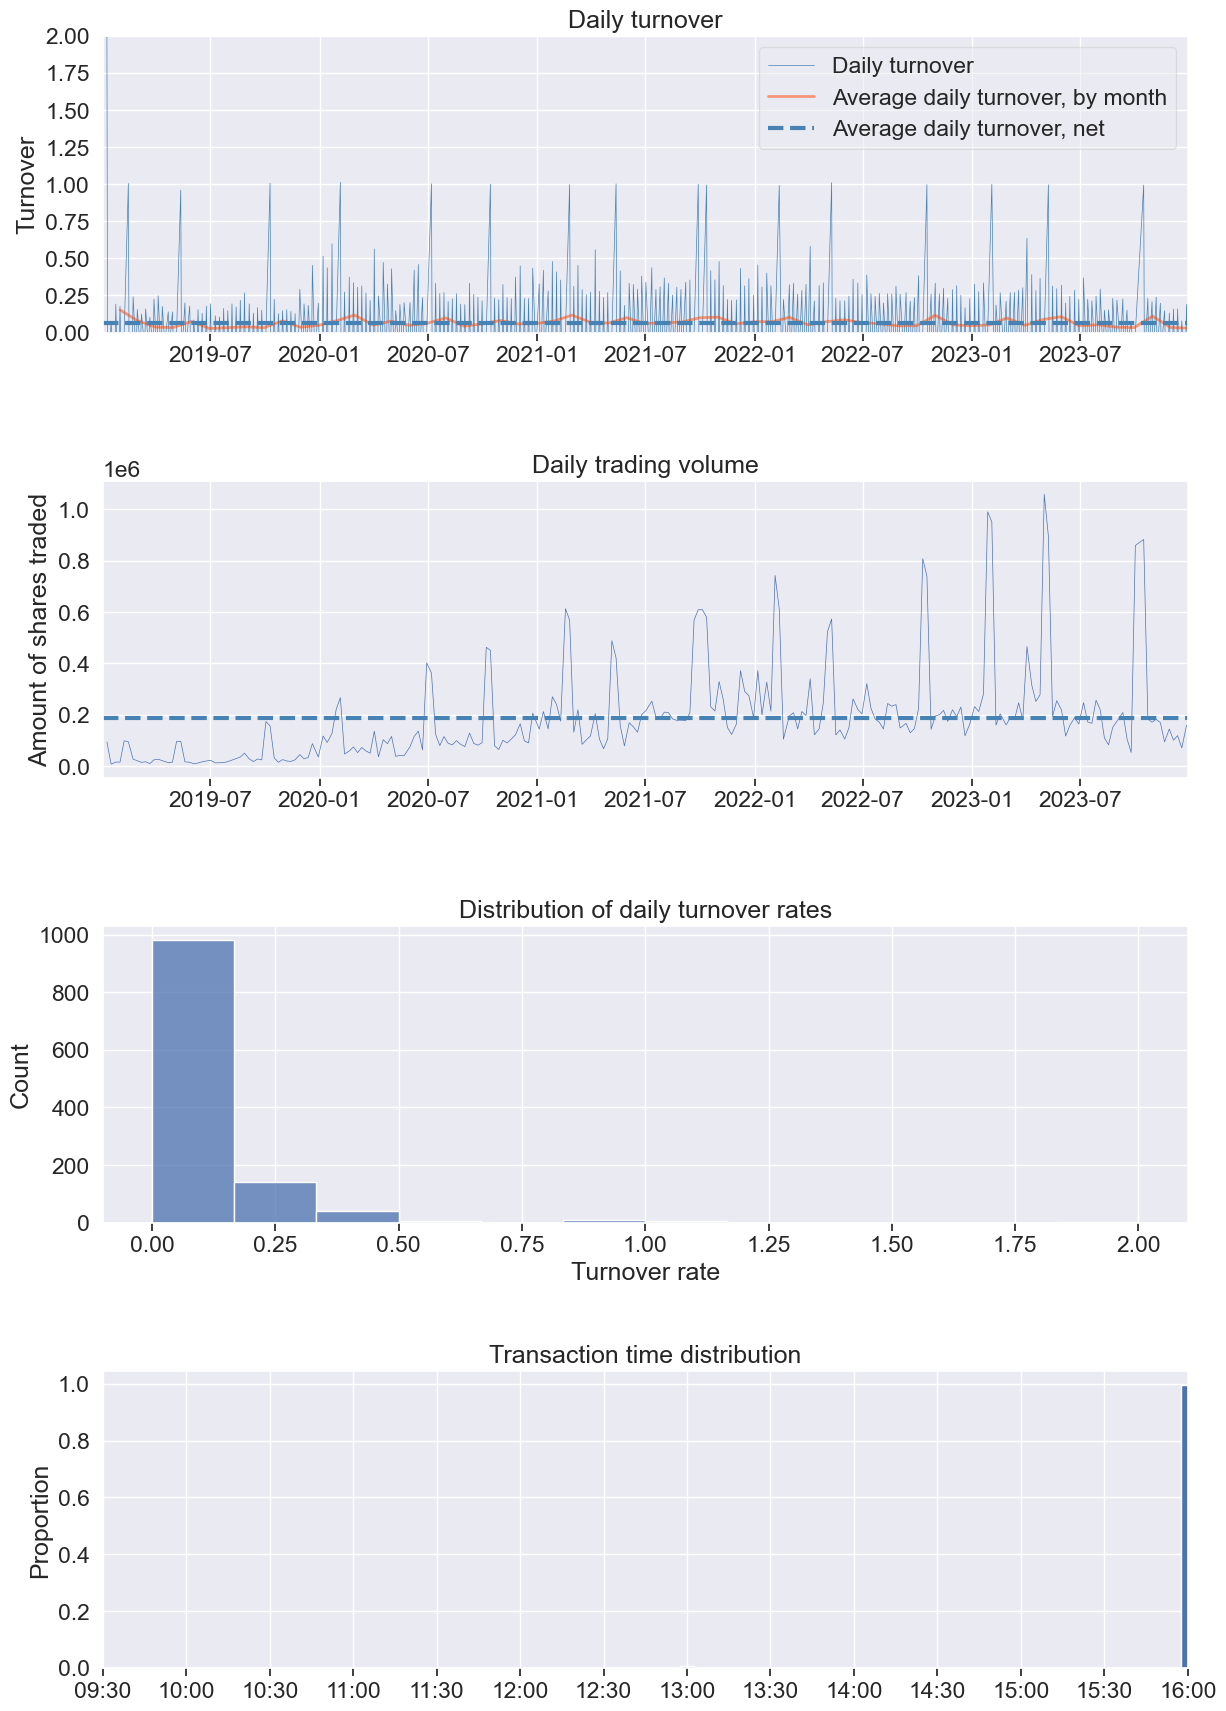

In [25]:
res_filename = "data/outputs/backtest.pkl"
create_full_tear_sheet(res_filename, benchmark_filename, round_trips=False)